# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Hojo, Hiroshi\
_Student No._: 202201830\
_Section_: TXY-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Hiroshi Hojo (SGD.)**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

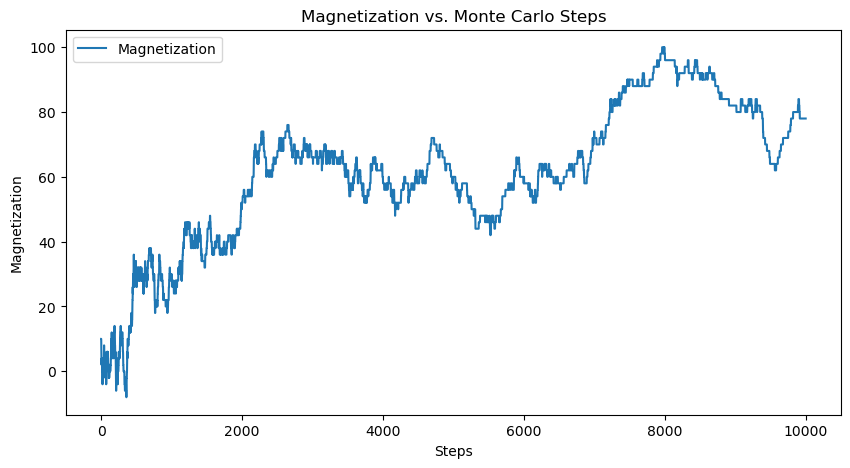

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Seed
np.random.seed(5)

#Constants
N = 20  #Grid size
J = 1   #Interaction constant
T = 1   #Temperature
kb = 1  #Boltzmann constant
beta = 1 / (kb * T)
steps = 10000

#Initialize the spin lattice randomly with values +1 or -1
s = np.random.choice([-1, 1], size=(N, N))

def energy(s):
    #Compute total energy of spin config.
    s1 = s[:-1, :] * s[1:, :]   #Interactions along the rows
    s2 = s[:, :-1] * s[:, 1:]   #Interactions along the columns
    E = -J * (np.sum(s1) + np.sum(s2))
    return E

#Initialize variables
eplot = []
Mplot = []
E1 = energy(s)
M = np.sum(s)

#MCS
for k in range(steps):
    #Randomly pick a spin to flip
    i = np.random.randint(N)
    j = np.random.randint(N)

    #Calculate energy difference if spin is flipped
    s[i, j] *= -1
    E2 = energy(s)
    dE = E2 - E1

    #Decide whether to accept the flip
    if dE > 0 and np.random.random() >= np.exp(-beta * dE):
        #Revert flip
        s[i, j] *= -1
    else:
        #Accept flip
        E1 = E2
        M = np.sum(s)

    #Record magnetization
    Mplot.append(M)

#Plot the magnetization over time
plt.figure(figsize=(10, 5))
plt.plot(Mplot, label="Magnetization")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("Magnetization vs. Monte Carlo Steps")
plt.legend()
plt.show()


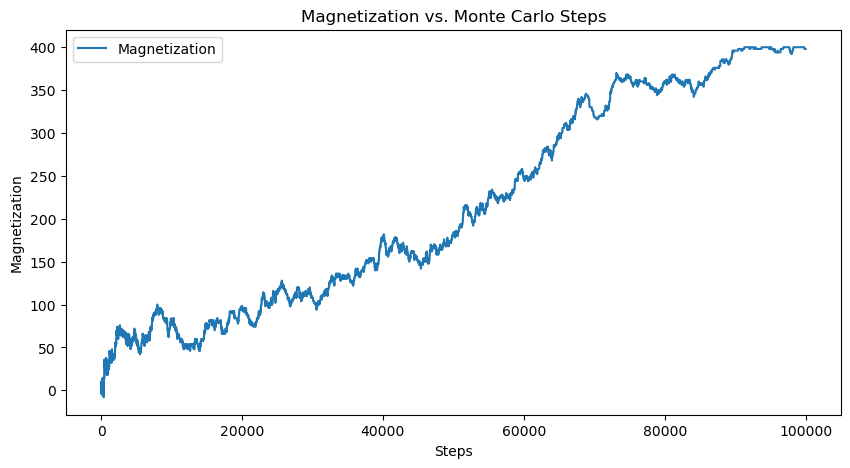

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#Seed
np.random.seed(5)

#Constants
N = 20  #Grid size
J = 1   #Interaction constant
T = 1   #Temperature
kb = 1  #Boltzmann constant
beta = 1 / (kb * T)
steps = 100000

#Initialize the spin lattice randomly with values +1 or -1
s = np.random.choice([-1, 1], size=(N, N))

def energy(s):
    #Compute total energy of spin config.
    s1 = s[:-1, :] * s[1:, :]   # Interactions along the rows
    s2 = s[:, :-1] * s[:, 1:]   #Interactions along the columns
    E = -J * (np.sum(s1) + np.sum(s2))
    return E

#Initialize variables
eplot = []
Mplot = []
E1 = energy(s)
M = np.sum(s)

#MCS
for k in range(steps):
    #Randomly pick a spin to flip
    i = np.random.randint(N)
    j = np.random.randint(N)

    #Calculate energy difference if spin is flipped
    s[i, j] *= -1
    E2 = energy(s)
    dE = E2 - E1

    #Decide whether to accept the flip
    if dE > 0 and np.random.random() >= np.exp(-beta * dE):
        #Revert flip
        s[i, j] *= -1
    else:
        #Accept flip
        E1 = E2
        M = np.sum(s)

    #Record magnetization
    Mplot.append(M)

#Plot the magnetization over time
plt.figure(figsize=(10, 5))
plt.plot(Mplot, label="Magnetization")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("Magnetization vs. Monte Carlo Steps")
plt.legend()
plt.show()


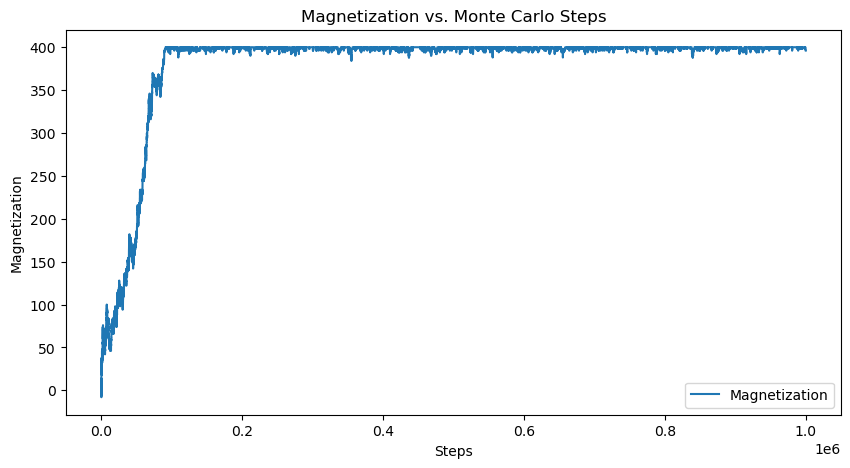

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Seed
np.random.seed(5)

#Constants
N = 20  #Grid size
J = 1   #Interaction constant
T = 1   #Temperature
kb = 1  #Boltzmann constant
beta = 1 / (kb * T)
steps = 1000000

#Initialize the spin lattice randomly with values +1 or -1
s = np.random.choice([-1, 1], size=(N, N))

def energy(s):
    #Compute total energy of spin config.
    s1 = s[:-1, :] * s[1:, :]   # Interactions along the rows
    s2 = s[:, :-1] * s[:, 1:]   #Interactions along the columns
    E = -J * (np.sum(s1) + np.sum(s2))
    return E

#Initialize variables
eplot = []
Mplot = []
E1 = energy(s)
M = np.sum(s)

#MCS
for k in range(steps):
    #Randomly pick a spin to flip
    i = np.random.randint(N)
    j = np.random.randint(N)

    #Calculate energy difference if spin is flipped
    s[i, j] *= -1
    E2 = energy(s)
    dE = E2 - E1

    #Decide whether to accept the flip
    if dE > 0 and np.random.random() >= np.exp(-beta * dE):
        #Revert flip
        s[i, j] *= -1
    else:
        #Accept flip
        E1 = E2
        M = np.sum(s)

    #Record magnetization
    Mplot.append(M)

#Plot the magnetization over time
plt.figure(figsize=(10, 5))
plt.plot(Mplot, label="Magnetization")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("Magnetization vs. Monte Carlo Steps")
plt.legend()
plt.show()



### **What is Observed?**
1. **Initial Region (Sharp Increase):**
   - At the beginning, the magnetization increases sharply. This happens because the spins in the lattice are initially assigned random values (+1 or -1), resulting in a disordered state with low net magnetization.
   - As the simulation progresses, the system evolves towards a more energetically favorable state. Spins begin to align more coherently, increasing the total magnetization.

2. **Plateau Region (Stabilization):**
   - After the initial increase, the magnetization stabilizes and fluctuates around a high value. This indicates that the system has reached a state of equilibrium.
   - In this equilibrium state, most spins are aligned, and the fluctuations in magnetization are due to thermal noise.

### **Why does it behave this way?**
- The sharp increase in magnetization is due to the MC algorithm finding lower-energy configurations, where spins align to minimize the system's energy.
- The plateau indicates that the system has reached equilibrium at the given temperature \( T \). At this point, the spin lattice has a stable net magnetization, with occasional small fluctuations caused by random spin flips accepted by the algorithm.

### **Effect of Changing the Number of Steps**
1. **Decreasing the Steps:**
   - If the number of steps is reduced significantly (e.g., 10,000 steps), the system will not have enough time to reach equilibrium. The magnetization will still be evolving and may not stabilize, leaving the graph incomplete or with lower overall magnetization which can be observed with my first run.
   - especially noticeable for large systems or at lower temperatures, where equilibration takes more steps.

2. **Increasing the Number of Steps:**
   - If the number of steps is increased beyond 1,000,000, the graph will likely continue to show fluctuations around the equilibrium magnetization but will not exhibit further large-scale changes. This is because the system has already equilibrated, and additional steps primarily allow for finer sampling of the equilibrium state. These additional steps can help reduce statistical uncertainty in any measurements.